In [71]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [9]:
#Importing the datasets

suicide2005=pd.read_csv("2005.csv")
suicide2006=pd.read_csv("2006.csv")
suicide2007=pd.read_csv("2007.csv")
suicide2008=pd.read_csv("2008.csv")
suicide2009=pd.read_csv("2009.csv")
suicide2010=pd.read_csv("2010.csv")
suicide2011=pd.read_csv("2011.csv")

In [10]:
#Columns of the dataset

suicide2005.columns

Index(['Unnamed: 0', 'state', 'vet_pop', 'overall_pop_18', 'vet_pop_p',
       'vet_suicides', 'all_suicides', 'vet_suicides_p', 'vet_males',
       'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29',
       'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44',
       'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64',
       'vet_55_64', 'vet_60', 'vet_65', 'vet_rate', 'civ_rate'],
      dtype='object')

In [11]:
#Concatinating the dataset

frames = [suicide2005, suicide2006, suicide2007, suicide2008, suicide2009, suicide2010, suicide2011]
bigdata = pd.concat(frames)
bigdata.head()
bigdata.to_csv("Cumulated_Data.csv", index=False)

In [12]:
#Columns of the concatinated dataset

bigdata.columns

Index(['Unnamed: 0', 'state', 'vet_pop', 'overall_pop_18', 'vet_pop_p',
       'vet_suicides', 'all_suicides', 'vet_suicides_p', 'vet_males',
       'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29',
       'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44',
       'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64',
       'vet_55_64', 'vet_60', 'vet_65', 'vet_rate', 'civ_rate'],
      dtype='object')

In [13]:
#Seperating the Independant and Dependant Variables

y = bigdata.vet_suicides
feature_names = ["state", "vet_pop","vet_males", "vet_females"]

X = bigdata[feature_names]
X.head()

,state,vet_pop,vet_males,vet_females
0,Alabama,403950,NaN,NaN
1,Alaska,74482,22.0,2.0
2,Arizona,538880,NaN,NaN
3,Arkansas,259304,79.0,2.0
4,California,2193336,613.0,20.0


In [14]:
#Label encoding the states

label_encoder = LabelEncoder()
X['state']=label_encoder.fit_transform(X['state'])

X.head()

C:\Users\Harshinee\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,state,vet_pop,vet_males,vet_females
0,0,403950,NaN,NaN
1,1,74482,22.0,2.0
2,2,538880,NaN,NaN
3,3,259304,79.0,2.0
4,4,2193336,613.0,20.0


In [15]:
#Filling the null values with 0

X = X.fillna(0)

In [16]:
#Converting the dataset into a numpy array

X=X.iloc[:,:].values
y=np.array(y)

In [17]:
#One-Hot-Encoding the states

one_hot_encoder=OneHotEncoder(categorical_features=[0])

X=one_hot_encoder.fit_transform(X).toarray()

In [18]:
#Removing the dummy variable trap

X=X[:, 1:]

In [19]:
#Splitting the dataset into Training set and Test Set

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1)

In [80]:
#Making the Random Forest model

classifier = RandomForestRegressor(n_estimators=100, criterion='mae', n_jobs=-1, random_state=0)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
print(mean_absolute_error(y_test, preds))

effectiveness_of_model={}
effectiveness_of_model['Random Forest model'] = mean_absolute_error(y_test, preds)

5.84642857143


In [81]:
#Making SVR model

classifier_2=SVR(kernel='rbf')
classifier_2.fit(X_train, y_train)
preds_2=classifier_2.predict(X_test)
print(mean_absolute_error(y_test, preds_2))

effectiveness_of_model['SVR model'] = mean_absolute_error(y_test, preds_2)

80.1785714286


In [82]:
#Making the Linear Regression model

classifier_3=LinearRegression()
classifier_3.fit(X_train, y_train)
preds_3=classifier_3.predict(X_test)
print(mean_absolute_error(y_test, preds_3))

effectiveness_of_model['Linear Regression model'] = mean_absolute_error(y_test, preds_3)

5.05595506443


In [40]:
# Calculation of confidence limits (95%)

import scipy.stats as st

def confidence_interval(X, c):
    x_bar = np.mean(X)
    z_score = st.norm.ppf(1 - ((1 - c) / 2))
    sqrt_n = np.sqrt(len(X))
    std_dev = np.std(X)
    
    delta = z_score * (std_dev / sqrt_n)
    return np.array([x_bar - delta, x_bar + delta])


years = range(2005, 2012)

cis = []
for year in years:
    df = pd.read_csv("C:/Users/Harshinee/Desktop/Project-TunnelHead/{0}.csv".format(year), index_col=0)
    df = pd.DataFrame(
        {'vet': df['vet_suicides'] / df['vet_pop'],
         'civ': (df['all_suicides'] - df['vet_suicides']) / 
                (df['overall_pop_18'] - df['vet_pop'])}
    )
    cis.append({'civ': confidence_interval(df.civ, 0.95),
                'vet': confidence_interval(df.vet, 0.95)})


In [41]:
civ_means = [np.mean(c['civ'])*10**6 for c in cis]
vet_means = [np.mean(c['vet'])*10**6 for c in cis]

civ_mins = [c['civ'][0]*10**6 for c in cis]
vet_mins = [c['vet'][0]*10**6 for c in cis]

civ_maxs = [c['civ'][1]*10**6 for c in cis]
vet_maxs = [c['vet'][1]*10**6 for c in cis]

In [48]:
ind = pd.Index(range(2005, 2012))

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Suicides Per Million Estimates, 2005-2011").set_position([.5, 1.05])

pd.Series(civ_means, index=ind).plot.line(color='red', ax=axarr[0])
pd.Series(civ_mins, index=ind).plot.line(color='steelblue', ax=axarr[0])
pd.Series(civ_maxs, index=ind).plot.line(color='green', ax=axarr[0])
axarr[0].set_title("Civilians")

pd.Series(vet_means, index=ind).plot.line(color='red', ax=axarr[1])
pd.Series(vet_mins, index=ind).plot.line(color='steelblue', ax=axarr[1])
pd.Series(vet_maxs, index=ind).plot.line(color='green', ax=axarr[1])
axarr[1].set_title("Veterans")
pass    

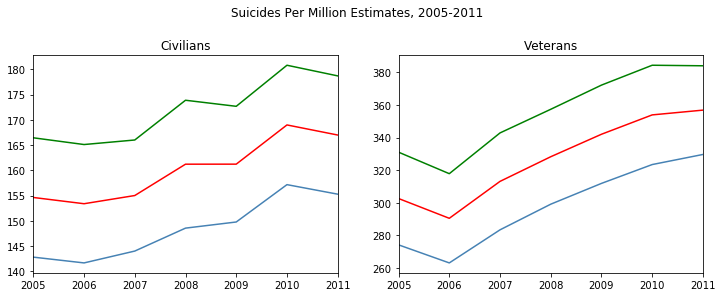

In [49]:
plt.show()

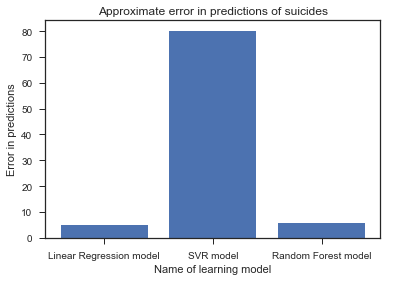

In [93]:
plt.bar(range(len(effectiveness_of_model)), list(effectiveness_of_model.values()), align='center')
plt.xticks(range(len(effectiveness_of_model)), list(effectiveness_of_model.keys()))
plt.title("Approximate error in predictions of suicides")
plt.xlabel("Name of learning model")
plt.ylabel("Error in predictions")
plt.show()